In [1]:
import pandas as pd
import numpy as np

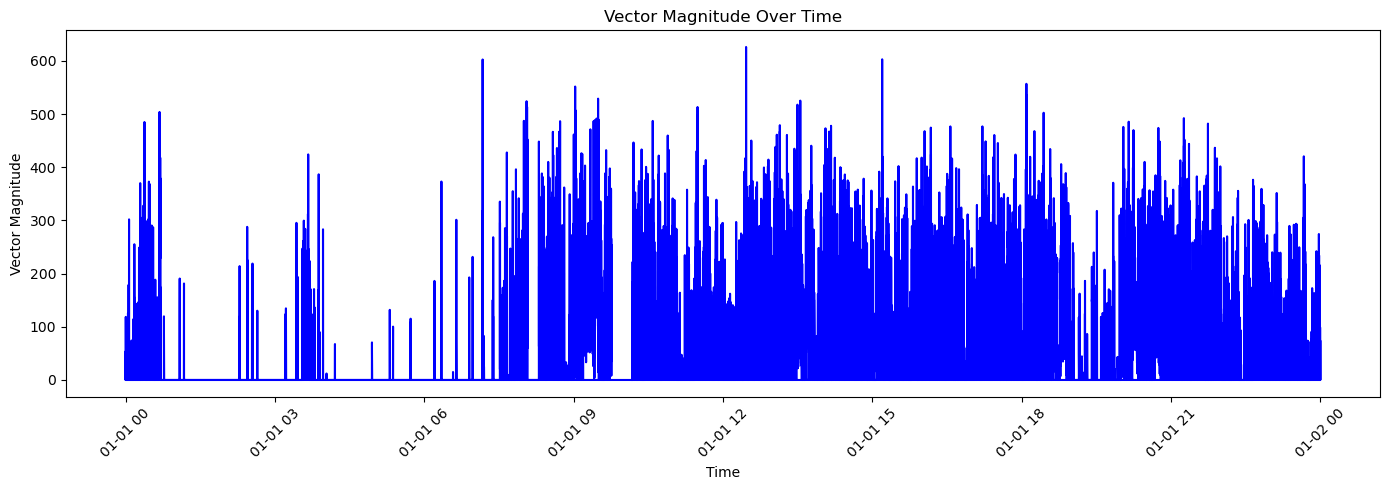

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and clean the data
actigraph_df = pd.read_csv('DataPaper/user_1/Actigraph.csv')
actigraph_df = actigraph_df.drop('Unnamed: 0', axis=1)

# Convert 'time' to datetime (assuming all data is from the same day)
actigraph_df['time'] = pd.to_datetime(actigraph_df['time'], format='%H:%M:%S')

# Plot
plt.figure(figsize=(14, 5))
plt.plot(actigraph_df['time'], actigraph_df['Vector Magnitude'], color='blue')
plt.xlabel('Time')
plt.ylabel('Vector Magnitude')
plt.title('Vector Magnitude Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
actigraph_df['time']

0       1900-01-01 10:10:22
1       1900-01-01 10:10:23
2       1900-01-01 10:10:24
3       1900-01-01 10:10:25
4       1900-01-01 10:10:26
                ...        
67931   1900-01-01 09:45:25
67932   1900-01-01 09:45:26
67933   1900-01-01 09:45:27
67934   1900-01-01 09:45:28
67935   1900-01-01 09:45:35
Name: time, Length: 67936, dtype: datetime64[ns]

In [5]:
pd.read_csv('DataPaper/user_1/Activity.csv')

,Unnamed: 0,Activity,Start,End,Day
0,0,2,10:00,10:22,1
1,1,9,10:37,10:40,1
2,2,10,10:40,10:45,1
3,3,6,10:55,11:00,1
4,4,2,11:00,11:20,1
5,5,7,12:00,13:00,1
6,6,4,13:30,13:35,1
7,7,10,13:35,13:40,1
8,8,3,13:40,13:45,1
9,9,6,13:55,14:30,1


In [6]:
pd.read_csv('DataPaper/user_1/questionnaire.csv')

,Unnamed: 0,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
0,0,47,41,43,5,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10


In [7]:
pd.read_csv('DataPaper/user_1/RR.csv')

,Unnamed: 0,ibi_s,day,time
0,1,0.258,1,10:10:17
1,2,0.319,1,10:10:18
2,3,0.266,1,10:10:18
3,4,0.401,1,10:10:18
4,5,1.089,1,10:10:19
...,...,...,...,...
91853,91854,0.470,2,09:45:25
91854,91855,0.465,2,09:45:25
91855,91856,0.463,2,09:45:25
91856,91857,0.457,2,09:45:26


In [8]:
pd.read_csv('DataPaper/user_1/saliva.csv')

,Unnamed: 0,SAMPLES,Cortisol NORM,Melatonin NORM
0,1,before sleep,0.034137,1.738385e-08
1,2,wake up,0.077939,6.747893e-09


In [9]:
pd.read_csv('DataPaper/user_1/sleep.csv')

,Unnamed: 0,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index
0,0,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10,19.091
1,1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.920,0,8.920


In [20]:
import pandas as pd
import os

# Set base directory
base_dir = 'DataPaper'
user_ids = [f'user_{i}' for i in range(1, 23)]
file_types = ['actigraph', 'activity', 'questionnaire', 'RR', 'saliva', 'sleep']

# Dictionary to store combined DataFrames
combined_dfs = {file: [] for file in file_types}

# Loop through users and file types
for user in user_ids:
    for file in file_types:
        file_path = os.path.join(base_dir, user, f"{file}.csv")
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['user'] = user  # Add user ID as a column
            combined_dfs[file].append(df)

# Concatenate each list of DataFrames into one per type
for file in file_types:
    combined_dfs[file] = pd.concat(combined_dfs[file], ignore_index=True)

# Example: access all actigraph data
actigraph_df = combined_dfs['actigraph']

/var/folders/cl/4ndfg5191d74xd8pclttf16w0000gn/T/ipykernel_95052/1702650687.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dfs[file] = pd.concat(combined_dfs[file], ignore_index=True)


In [22]:
combined_dfs

{'actigraph':          Unnamed: 0  Axis1  Axis2  Axis3  Steps     HR  Inclinometer Off  \
 0                82      0      0      0      0   68.0                 0   
 1                83     11      4      7      1   68.0                 0   
 2                84      0     21     10      0   68.0                 0   
 3                85      0      1     24      0   68.0                 0   
 4                86     34     14     63      1  154.0                 0   
 ...             ...    ...    ...    ...    ...    ...               ...   
 1462673       84411     90    115     80      0   72.0                 0   
 1462674       84412     33     49     28      1   72.0                 0   
 1462675       84413     32     25     34      0   72.0                 0   
 1462676       84414     59     28    188      1   72.0                 0   
 1462677       84415     70     22    158      0   72.0                 0   
 
          Inclinometer Standing  Inclinometer Sitting  Inclin

In [21]:
actigraph_df

,Unnamed: 0,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time,user
0,82,0,0,0,0,68.0,0,1,0,0,0.00,1,10:10:22,user_1
1,83,11,4,7,1,68.0,0,1,0,0,13.64,1,10:10:23,user_1
2,84,0,21,10,0,68.0,0,0,1,0,23.26,1,10:10:24,user_1
3,85,0,1,24,0,68.0,0,0,1,0,24.02,1,10:10:25,user_1
4,86,34,14,63,1,154.0,0,1,0,0,72.95,1,10:10:26,user_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462673,84411,90,115,80,0,72.0,0,1,0,0,166.51,2,08:38:51,user_22
1462674,84412,33,49,28,1,72.0,0,1,0,0,65.38,2,08:38:52,user_22
1462675,84413,32,25,34,0,72.0,0,1,0,0,52.96,2,08:38:53,user_22
1462676,84414,59,28,188,1,72.0,0,1,0,0,199.02,2,08:38:54,user_22


In [23]:
import pandas as pd
import os

# Set base directory
base_dir = 'DataPaper'
user_ids = [f'user_{i}' for i in range(1, 23)]
file_types = ['actigraph', 'activity', 'questionnaire', 'RR', 'saliva', 'sleep']

# Dictionary to collect user DataFrames
combined_dfs = {file: [] for file in file_types}

# Read and collect
for user in user_ids:
    for file in file_types:
        file_path = os.path.join(base_dir, user, f"{file}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['user'] = user
            combined_dfs[file].append(df)

# Save each combined file to CSV
for file, dfs in combined_dfs.items():
    if dfs:  # Ensure there's something to save
        df_combined = pd.concat(dfs, ignore_index=True)
        df_combined.to_csv(f'all_{file}.csv', index=False)

/var/folders/cl/4ndfg5191d74xd8pclttf16w0000gn/T/ipykernel_95052/2868765262.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat(dfs, ignore_index=True)


In [24]:
pd.r

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_data/all_actigraph.csv'